In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/Users/marcos/Documents/00_Git_Projetos/SeriesTemporais/SeriesTemporais_Python/Download/Dados/AirPassengers.csv',
                   parse_dates=['Month'], index_col='Month') #, date_parser=dateparse)

In [3]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

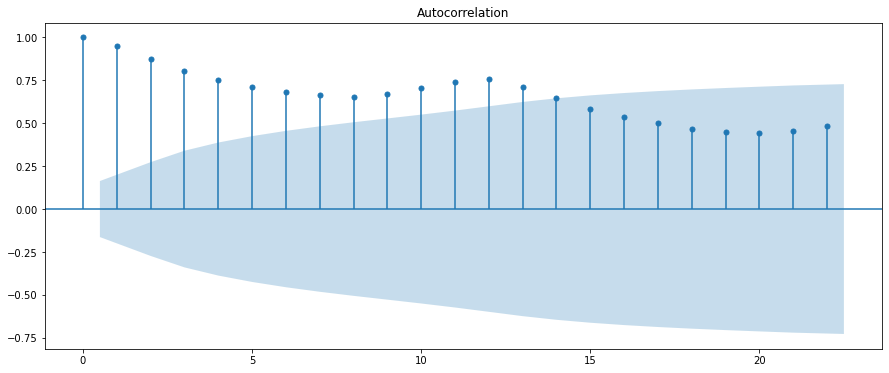

In [5]:
plot_acf(data)
plt.show()

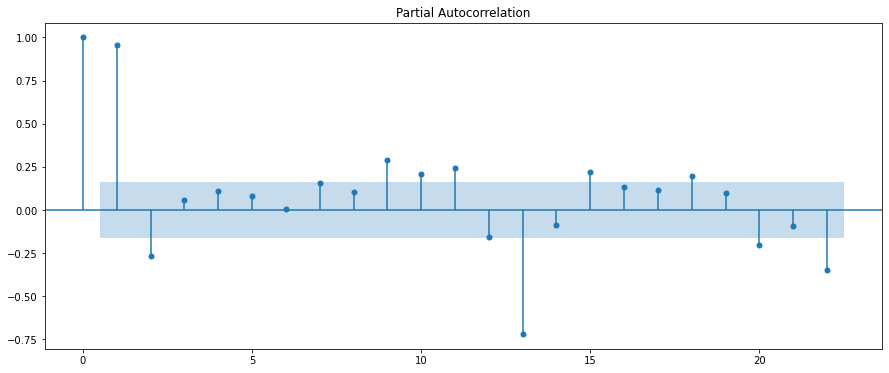

In [6]:
plot_pacf(data)
plt.show()

In [7]:
from statsmodels.tsa.arima_model import ARIMA

In [8]:
model = ARIMA(data, order=(2,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:          D.#Passengers   No. Observations:                  143
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -694.988
Method:                       css-mle   S.D. of innovations             31.199
Date:                Wed, 15 Dec 2021   AIC                           1397.975
Time:                        08:09:56   BIC                           1409.827
Sample:                    02-01-1949   HQIC                          1402.791
                         - 12-01-1960                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.4075      3.064      0.786      0.432      -3.597       8.412
ar.L1.D.#Passengers     0.3792      0.082      4.605      0.000       0.218       0.541
ar.L2.D.#Passeng

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [9]:
# imprimir os resíduos do modelo
from pandas import DataFrame

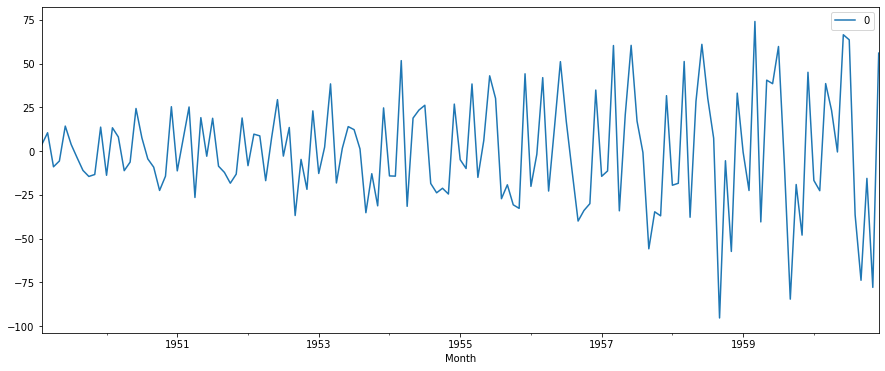

In [10]:
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()

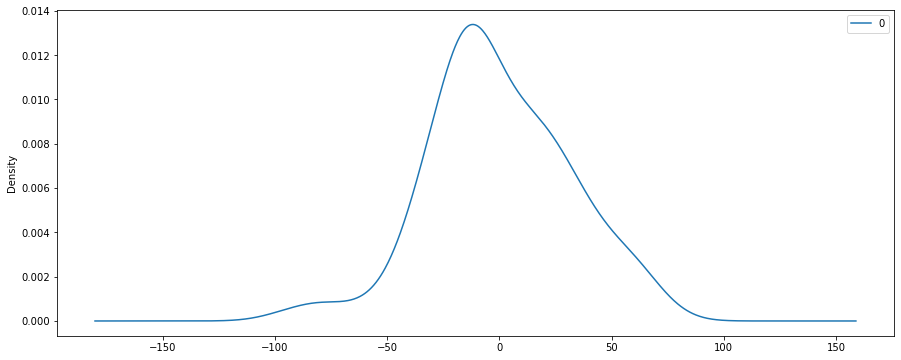

                0
count  143.000000
mean     0.016844
std     31.309377
min    -95.399557
25%    -18.811525
50%     -4.459777
75%     21.848526
max     74.096249


In [13]:
# diagrama de densidade dos residuos
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [14]:
X = data.values

Previsto=363.598564, esperado=340.000000
Previsto=353.342604, esperado=318.000000
Previsto=327.329522, esperado=362.000000
Previsto=386.294986, esperado=348.000000
Previsto=351.869553, esperado=363.000000
Previsto=374.431363, esperado=435.000000
Previsto=446.150583, esperado=491.000000
Previsto=478.475995, esperado=505.000000
Previsto=471.328312, esperado=404.000000
Previsto=348.417687, esperado=359.000000
Previsto=351.957219, esperado=310.000000
Previsto=320.247918, esperado=337.000000
Previsto=376.052147, esperado=360.000000
Previsto=387.683981, esperado=342.000000
Previsto=356.134765, esperado=406.000000
Previsto=435.398182, esperado=396.000000
Previsto=395.108665, esperado=420.000000
Previsto=425.843144, esperado=472.000000
Previsto=472.008773, esperado=548.000000
Previsto=535.632172, esperado=559.000000
Previsto=515.320860, esperado=463.000000
Previsto=399.715191, esperado=407.000000
Previsto=388.121982, esperado=362.000000
Previsto=366.896642, esperado=405.000000
Previsto=438.630

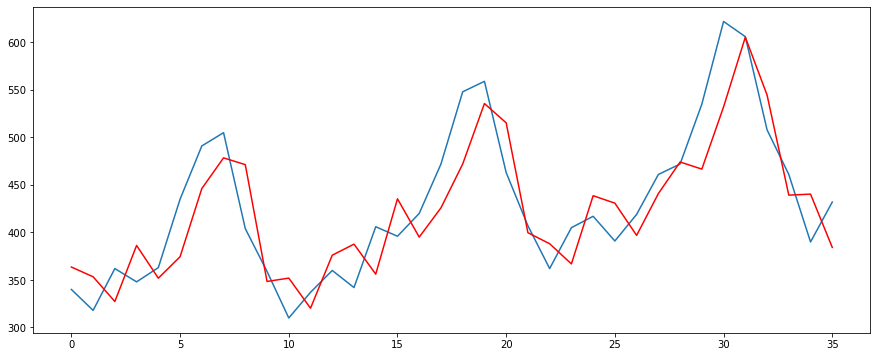

In [23]:
size = int(len(X) * 0.75)
train, test = X[0:size], X[size:len(X)]
history = [ x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(2,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('Previsto=%f, esperado=%f' % (yhat, obs))
    
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()